In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, epochs=100, verbose = verbose)
    
    return model

In [3]:
backend_santiago = pickle.load(open("backend_santiago", "rb"))

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [4]:
n = 100
x, y = generate_1D_mixed_gaussian()

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


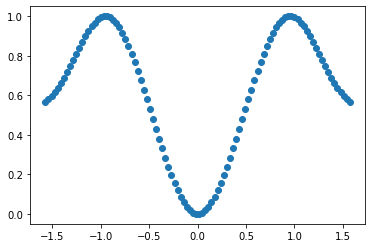

In [5]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training Models

### QNN

In [6]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=5),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend_santiago,
                         shots = 1024)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_1D_noisy"))

epoch: 0, loss: 0.12683268375000614
epoch: 1, loss: 0.11450010715383609
epoch: 2, loss: 0.10899115575411202
epoch: 3, loss: 0.09832812193873464
epoch: 4, loss: 0.08858726967949977
epoch: 5, loss: 0.08275227608672914
epoch: 6, loss: 0.08047662400848293
epoch: 7, loss: 0.07562840079289368
epoch: 8, loss: 0.07549882446541824
epoch: 9, loss: 0.07284268451402759
epoch: 10, loss: 0.07057216631993178
epoch: 11, loss: 0.07317669600587137
epoch: 12, loss: 0.07325121194489975
epoch: 13, loss: 0.07126183450343197
epoch: 14, loss: 0.06944889643220402
epoch: 15, loss: 0.06947370221939984
epoch: 16, loss: 0.07044278768662375
epoch: 17, loss: 0.06999022258153492
epoch: 18, loss: 0.07022719373994091
epoch: 19, loss: 0.06615743082736242
epoch: 20, loss: 0.06831813404852308
epoch: 21, loss: 0.06776876755889051
epoch: 22, loss: 0.06538012622086911
epoch: 23, loss: 0.0705501777319372
epoch: 24, loss: 0.06870853690820171
epoch: 25, loss: 0.06699947944626916
epoch: 26, loss: 0.06749429106917008
epoch: 27, l

### QCN

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 1024)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1_noisy"))

epoch: 0, loss: 0.13782207310031894
epoch: 1, loss: 0.12082813943569562
epoch: 2, loss: 0.11319703495806706
epoch: 3, loss: 0.10431275842392589
epoch: 4, loss: 0.09879752203290255
epoch: 5, loss: 0.08643947659328453
epoch: 6, loss: 0.0738450300917962
epoch: 7, loss: 0.06140143395760164
epoch: 8, loss: 0.051247305430959844
epoch: 9, loss: 0.04852302304843979
epoch: 10, loss: 0.04412173447191851
epoch: 11, loss: 0.03911248681394623
epoch: 12, loss: 0.03657841147341408
epoch: 13, loss: 0.034990440362007345
epoch: 14, loss: 0.030513398168545515
epoch: 15, loss: 0.026355867379136564
epoch: 16, loss: 0.02203043299792694
epoch: 17, loss: 0.02144178522249634
epoch: 18, loss: 0.020126110713316495
epoch: 19, loss: 0.02028877300728014
epoch: 20, loss: 0.019519681936064737
epoch: 21, loss: 0.01763435737095374
epoch: 22, loss: 0.01796364711781339
epoch: 23, loss: 0.016071515812282427
epoch: 24, loss: 0.014534456203442833
epoch: 25, loss: 0.01387192740748806
epoch: 26, loss: 0.013829977823685342
epo

In [11]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2_noisy"))

epoch: 0, loss: 0.1593583265595664
epoch: 1, loss: 0.08846082761067726
epoch: 2, loss: 0.08847660208377212
epoch: 3, loss: 0.0798060818086736
epoch: 4, loss: 0.058430023534644555
epoch: 5, loss: 0.03832025330183968
epoch: 6, loss: 0.030628235663976596
epoch: 7, loss: 0.03083024729787644
epoch: 8, loss: 0.026817076443331006
epoch: 9, loss: 0.022779475579639594
epoch: 10, loss: 0.020697399761722877
epoch: 11, loss: 0.020365547698956044
epoch: 12, loss: 0.01969589279792761
epoch: 13, loss: 0.019417756538345765
epoch: 14, loss: 0.020688450720140833
epoch: 15, loss: 0.018755605459717654
epoch: 16, loss: 0.01959442863134125
epoch: 17, loss: 0.02063576274995773
epoch: 18, loss: 0.019127212201426748
epoch: 19, loss: 0.01785086443371705
epoch: 20, loss: 0.01626145075587007
epoch: 21, loss: 0.014873250538031292
epoch: 22, loss: 0.01394084458692247
epoch: 23, loss: 0.013055982744538659
epoch: 24, loss: 0.013157455967315539
epoch: 25, loss: 0.012842086278010645
epoch: 26, loss: 0.01200305940774696

## 2D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 12
x, y = generate_2D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn[:,0:1]])
x_dnn = scaler(x, mode="standard")

In [ ]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

### QNN

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=10),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])
    print(x_qnn.shape)

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_2D_noisy"))

### QCN

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
    qcn_list.append([qcn, x_qcn, y, False])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)

saver(qcn_list, data_path("trainability_qcn_2D_reps_1_noisy"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots=1024)
   
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_2"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy_2"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_3"))

In [ ]:
qcn_list = loader(data_path("trainability_qcn_2D_reps_2_noisy_3"))
qcn_list = [[qcn, x_qcn, y, False] for qcn in qcn_list]
qcn_list[0][3] = True  

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2_noisy_4"))